# Decision Tree
- it can be used for both classification and regression,but mostly preferred for classification.
- inorder to build tree it uses CART algorithm which is Classification and Regression Tree :it basically does Binary splitting using condition and build tree
- works on non-linear data
- its a supervised learning technique

# Important terminlogy
- Root:it represents the entire population or sample and further divides into  two or more homogenus sets
- Splitting: it is a process of dividing a node into two or more sub nodes
- Decision node:when the sub node splites into sub node it is called decision node
- Leaf/terminal node: node that do not split is called leaf node
- pruning:when we remove the sub node of the decision node ,them=n it called pruning,just the opposite of splitting
- branch/subtree :subsection of a entire tree
- parent/child node:nodes divided sub node called parent.sub nodes divided into sub node is called child


# Attribute Selection Measure
- this measurement,we can easily select best attribute for the node in the tree.
- two popular technique for ASM

# Information Gain
it calculates how much information a featureprovide us about a class
- equation  

            -information gain = Entropy(s)-[(weigthed Avg)*Entropy(Each feature)]

# Entropy
entropy is a metric to measure the impurities in the given attribute.it specify the randomness in the data
 - equation 

           - Entropy(s)=-P(yes)log2P(yes)-P(no)log2P(no)
           -s =total no of sample
           -p(yes)=probability of yes
           -p(no)=probability of no

-thus the value of entropy must be low while select in the node

# Gini Index
it is measure of purity or impurity used while creating decision tree in the CART
- a attribute with low gini index is more preferred
- equation

             gini index= 1-summation(jPj^2)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset.head(4)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0


In [4]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
x=dataset.iloc[:,:-1]
y=dataset["Purchased"]

In [5]:
# here we have to do scaling since there huge difference in data of age and eSalary
from sklearn.preprocessing import StandardScaler

In [10]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


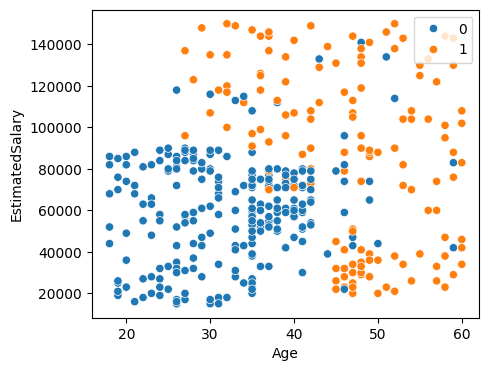

In [14]:
# check whether is a non-linear model
plt.figure(figsize=(5,4))
sns.scatterplot(x="Age",y="EstimatedSalary",data=dataset,hue="Purchased")
plt.legend(loc=1)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
# Pre pruning
dc=DecisionTreeClassifier(max_depth=3)
dc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [49]:
# Check whether the model is overfitted ,if difference between the score of train and test is high
dc.score(x_test,y_test)*100,dc.score(x_train,y_train)*100

(91.25, 91.875)

In [20]:
dc.predict([[19,19000]]) #19	19000	0

C:\Users\celia\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [22]:
from sklearn.tree import plot_tree

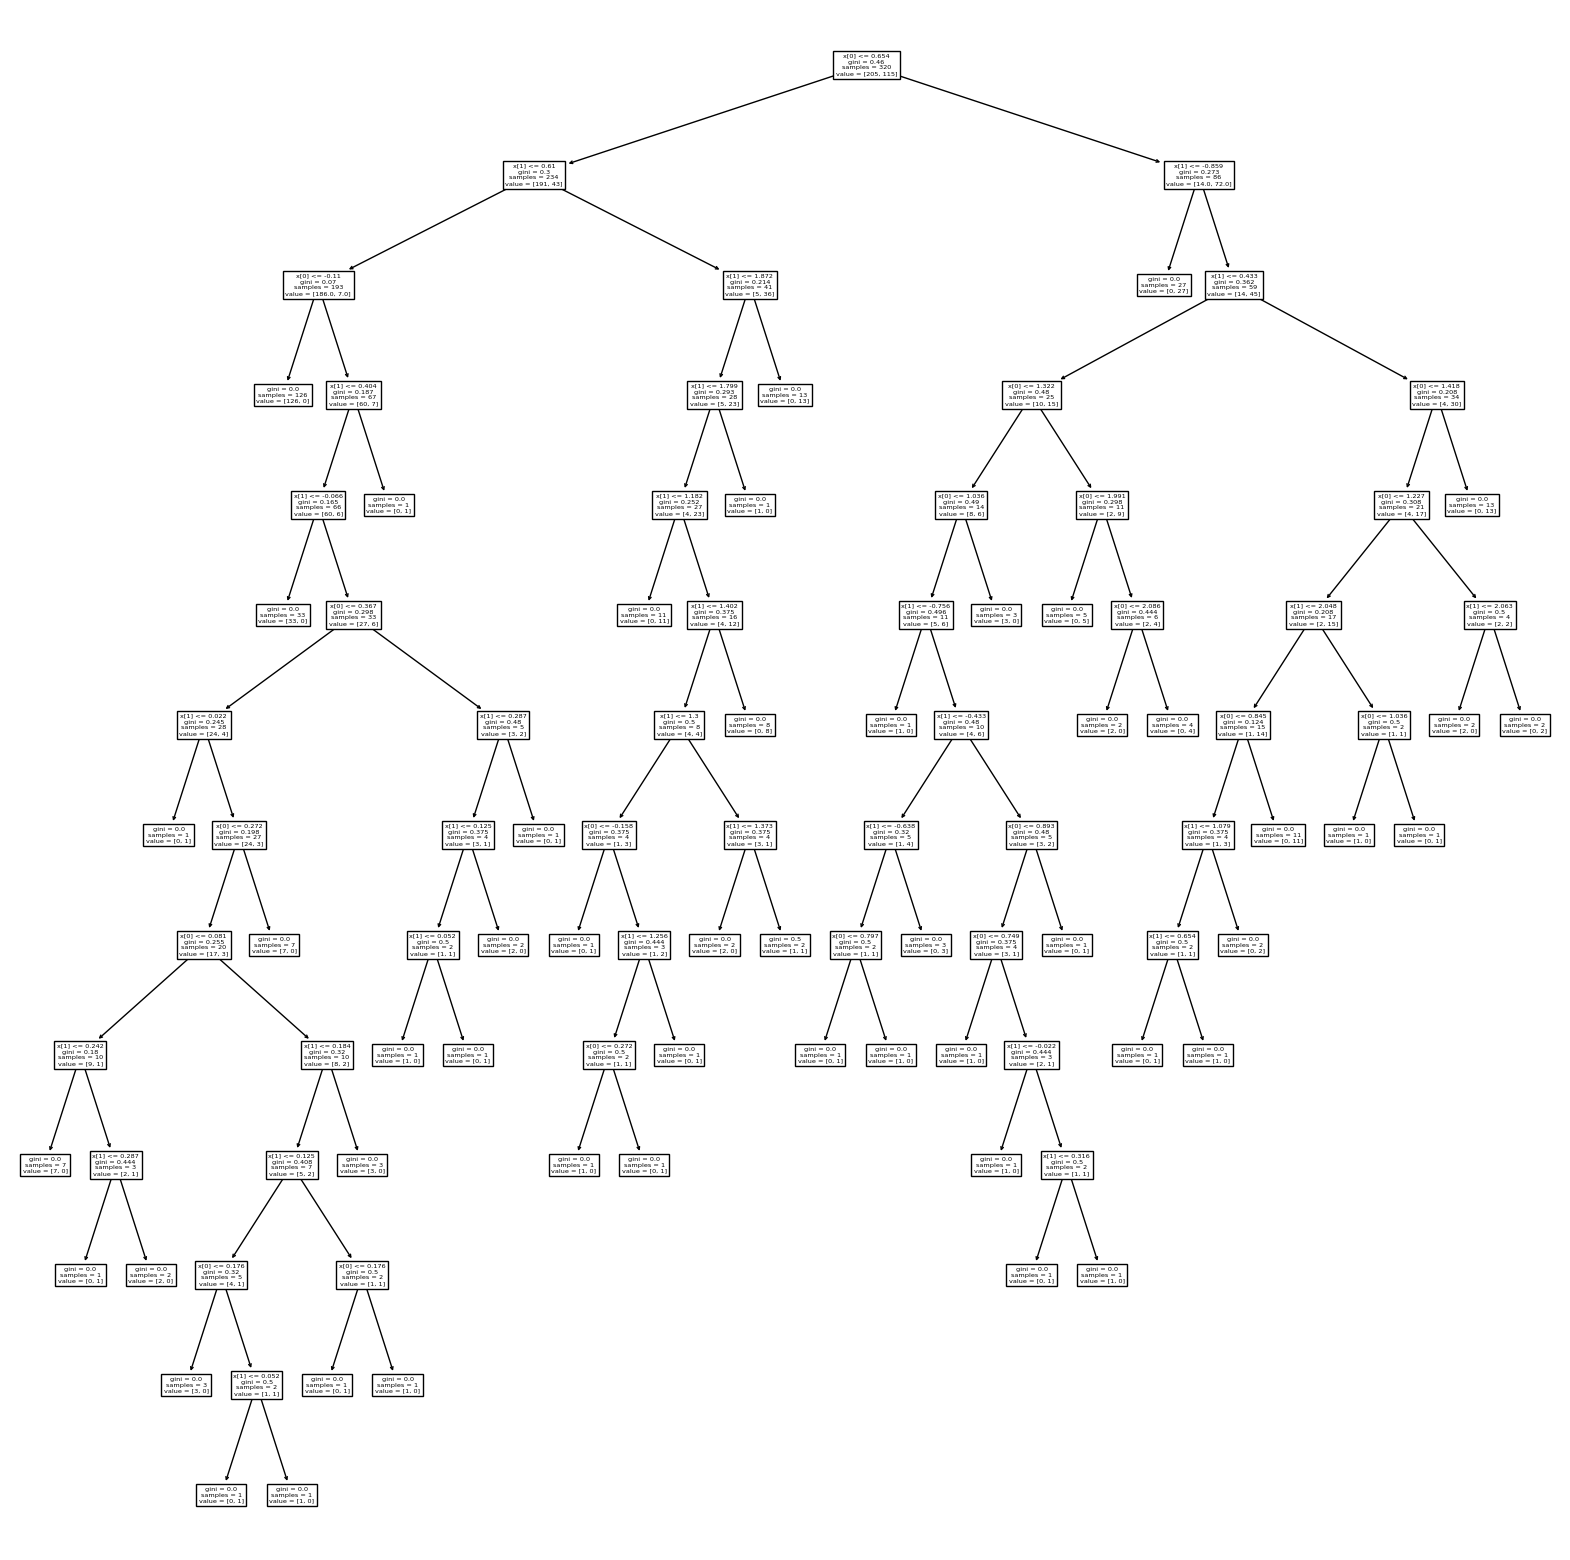

In [ ]:
plt.figure(figsize=(20,20))
plot_tree(dc)
plt.savefig("DecisionTreeClassifier.jpg")
plt.show()
# here the root node is splitted using gini index we can make it in the bases of entropy

In [31]:
# entropy
de=DecisionTreeClassifier(criterion='entropy')
de.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [32]:
de.score(x_test,y_test)*100
# here acurracy is same but might get different in different scenario

83.75

In [30]:
# check how they non-linear is separated 
from mlxtend.plotting import plot_decision_regions

C:\Users\celia\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


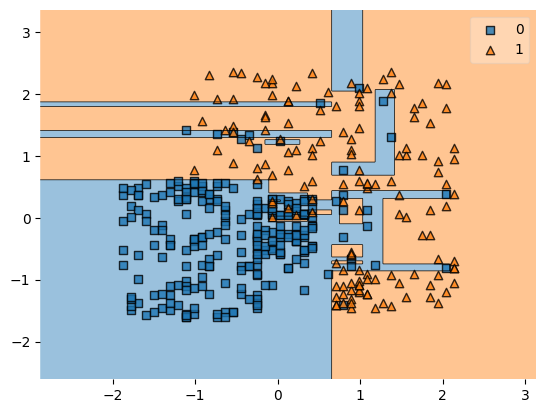

In [34]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dc)
plt.show()

# PRUNING
- It is performed the model is expreencing overfitting,otherwise not needed
- It is performed when the model is too complex and the number of parameters is too high

- to check whether your model is overfitting ,is done by checking acurracy of training is high and testing is low the it overfitting ie if there is huge difference between traing and testing acurracy 

# TYPES OF PRUNING
- pre pruning: pruning is one at each step
- post pruning: pruning is done after all the train ,testing is done

# Note
pre-pruning or early stopping involves stopping the tree before it has completed classifying the training set and post-pruning refers to pruning the tree after it has finished.

this done by adding max width in decision tree

# post pruning

In [47]:
for i in range(1,20):
    dc=DecisionTreeClassifier(max_depth=i)
    dc.fit(x_train,y_train)
    print(dc.score(x_test,y_test)*100,dc.score(x_train,y_train)*100,i)

90.0 82.1875 1
91.25 91.875 2
91.25 91.875 3
91.25 93.125 4
90.0 93.4375 5
86.25 95.0 6
85.0 96.875 7
85.0 97.1875 8
85.0 98.125 9
85.0 98.4375 10
83.75 99.0625 11
83.75 99.0625 12
83.75 99.375 13
83.75 99.6875 14
83.75 99.6875 15
83.75 99.6875 16
83.75 99.6875 17
83.75 99.6875 18
83.75 99.6875 19
